# Galactic latitude test
*26 Feb 2020*

Vary $b$ for fixed $\ell = 32.65$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize  import curve_fit

## Data

In [2]:
b_data = [0, .25, .5, .75, 1, 1.25, 1.5, -.25, -.5, -.75, -1, .125, .375, .625, -.125, -.375, -.625, -1.25]
wco_data = [48.01, 16.42, 10.1, 8.6, 2.47, 5.2, 4.7, 37.3, 9.42, 2.34, 1.31, 30.82, 9.43, 15.93, 38.38, 22.78, 7.38, -0.86]

## Error bars
Measurement error:
$$W_{CO} = \int T d\nu = \sum T_i \Delta \nu$$
$$\sigma_{WCO} = (0.15\,\mathrm{K})\sqrt{\frac{30\,\mathrm{km/s}}{0.65\,\mathrm{km/s}}} (0.65\,\mathrm{km/s}) = 0.66 \,\mathrm{K \, km/s}$$

In [18]:
wco_err = 0.15 * np.sqrt(30/.65) * .65
wco_errs = [wco_err for _ in b_data]
print('wco_err', wco_err)

wco_err 0.6623820649745886


## Quick gaussian fit

In [20]:
def gaussian(x, mean, sigma, norm):
    return norm * np.exp(-(x-mean)**2/(2*sigma**2))

In [21]:
popt_gauss, pcov_gauss = curve_fit(gaussian, b_data, wco_data, p0=[0, .2, 50], maxfev=10000) #, sigma=[3]*len(b_data))

Text(0, 0.5, 'W_CO (K km/s)')

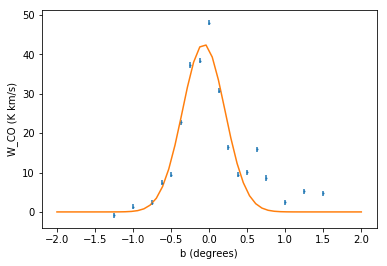

In [31]:
plt.errorbar(b_data, wco_data, wco_errs, fmt='o', markersize=1)
xs = np.linspace(-2,2)
ys = gaussian(xs, *popt_gauss)
plt.plot(xs, ys)
plt.xlabel('b (degrees)')
plt.ylabel('W_CO (K km/s)')

In [32]:
popt_gauss

array([-0.07096154,  0.27820271, 42.62602721])

## Quick double gaussian fit

Relevant paper: [link here](http://articles.adsabs.harvard.edu/pdf/1994ApJ...436L.173D)

In [33]:
def double_gaussian(x, mean, sigma, norm, mean2, sigma2, norm2):
    return norm * np.exp(-(x-mean)**2/(2*sigma**2)) + norm2 * np.exp(-(x-mean2)**2/(2*sigma2**2))

In [34]:
popt_gauss2, pcov_gauss2 = curve_fit(double_gaussian,
                                     b_data, wco_data, p0=[0, .2, 50, .2, .8, 10], maxfev=10000) #, sigma=[3]*len(b_data))

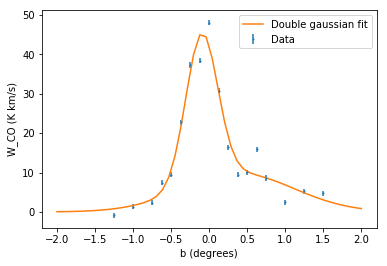

In [39]:
plt.errorbar(b_data, wco_data, wco_errs, fmt='o', markersize=1, label='Data')
xs = np.linspace(-2,2)
ys2 = double_gaussian(xs, *popt_gauss2)
plt.plot(xs, ys2, label='Double gaussian fit')
plt.xlabel('b (degrees)')
plt.ylabel('W_CO (K km/s)')
plt.legend()
#plt.savefig('imgs/double_gaussian.png')

In [37]:
popt_gauss2

array([-0.09681686,  0.20888485, 37.56430858,  0.38489606,  0.73162962,
        9.76525117])

## Quick scratch work

In [166]:
2.35*.207

0.48645

In [167]:
0.71680301 * 2.35  * 2.7555007253259096

4.64160535283137

In [168]:
8.34 * np.cos(32.65)

2.7555007253259096

## Miscellaneous notes
    
- Plan for 15 minute lecture Mar 13
- Go over practice talk ahead of time!! (Really coordinate to be done ahead of time, at least a day or two)
- Papers due after we get back from break